# Used Car Price Prediction

# Task to perform
1. Select dataset
1. Carry out Exploratory Data Analaysis
1. Apply Algorithm
1. Extract association rules

# 1. Dataset - used car price
## Dataset Description

| columns      | description                                |
| ------------ | ------------------------------------------ |
| model        | The model name for Volkswagen Car.         |
| year         | The registration year of the car.          |
| price        | Price of the car                           |
| transmission | The type of transmission used by the car.  |
| mileage      | The total distance the car has travelled.  |
| fuelType     | The type of fuel used by the car.          |
| tax          | Tax applied on the car.                    |
| mpg          | Miles per gallon                           |
| engineSize   | The displacement volume of the car engine. |


importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [2]:
data = pd.read_csv('./vw.csv')
data.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2585,Golf,2019,17643,Manual,3922,Petrol,145,49.6,1.0
2211,Golf,2019,20490,Semi-Auto,3980,Petrol,145,45.6,1.5
14305,Touran,2019,24999,Semi-Auto,4713,Diesel,150,45.6,2.0
832,Golf,2019,21995,Semi-Auto,50,Petrol,145,44.8,1.5
2865,Golf,2016,11990,Manual,39795,Petrol,30,53.3,1.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


All data is complete, no null values

In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# 2. Exploratory Data Analysis

### Numeric Features

In [5]:
data.select_dtypes(include=['int','float']).describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
from datetime import datetime

data['age'] = datetime.now().year - data['year']
data.drop('year', axis=1, inplace=True)
data.head(3)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,3
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,3
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,3


Deleting year and calculating age for each cars as it is more intuitive

#### Price

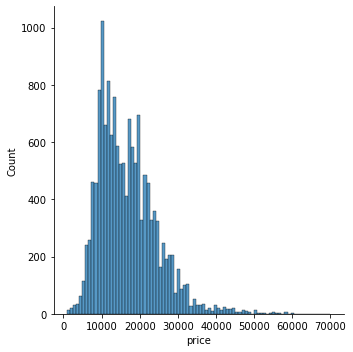

In [7]:
sns.displot(data['price'])

count    15157.000000
mean     16838.952365
std       7755.015206
min        899.000000
25%      10990.000000
50%      15497.000000
75%      20998.000000
max      69994.000000
Name: price, dtype: float64 



<AxesSubplot:>

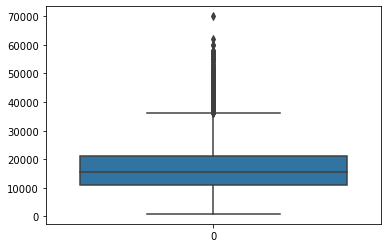

In [8]:
print(data['price'].describe(), "\n")
sns.boxplot(data=data.price)

In [9]:
data_price_max = data['price'].quantile(0.99,interpolation='midpoint')
data[data['price'] >= data_price_max]
data.drop(data[data['price'] >= data_price_max].index, inplace=True)

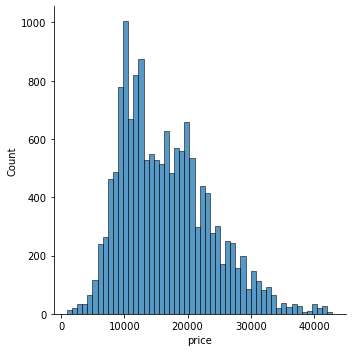

In [10]:
sns.displot(data.price)

count    15004.000000
mean     16518.011197
std       7092.216650
min        899.000000
25%      10978.750000
50%      15470.000000
75%      20990.000000
max      42900.000000
Name: price, dtype: float64 



<AxesSubplot:>

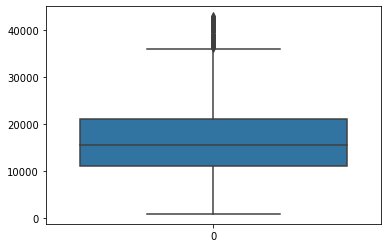

In [11]:
print(data['price'].describe(), "\n")
sns.boxplot(data=data.price)

**Which features affects the price the most?**

In [12]:
data.corr()['price'].sort_values(ascending=False)

price         1.000000
engineSize    0.554283
tax           0.497881
mpg          -0.482993
mileage      -0.534499
age          -0.635182
Name: price, dtype: float64

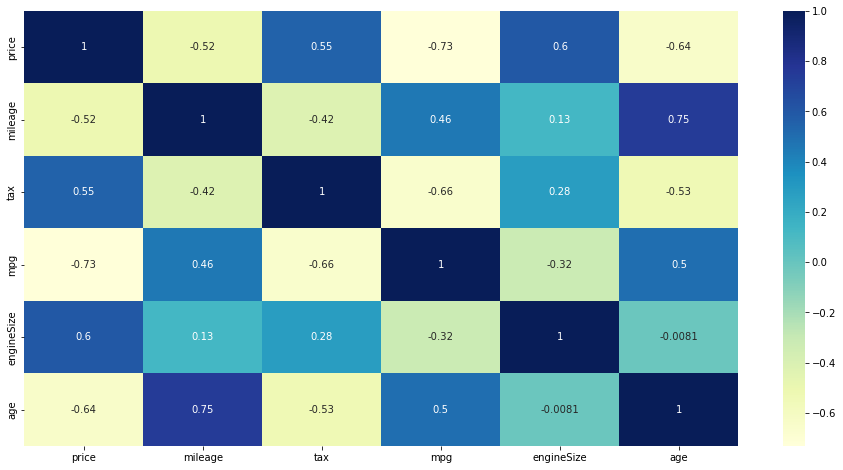

In [92]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the heatmap, we can see that age, engineSize and mileage has the more affect to price.

#### Age (Year)

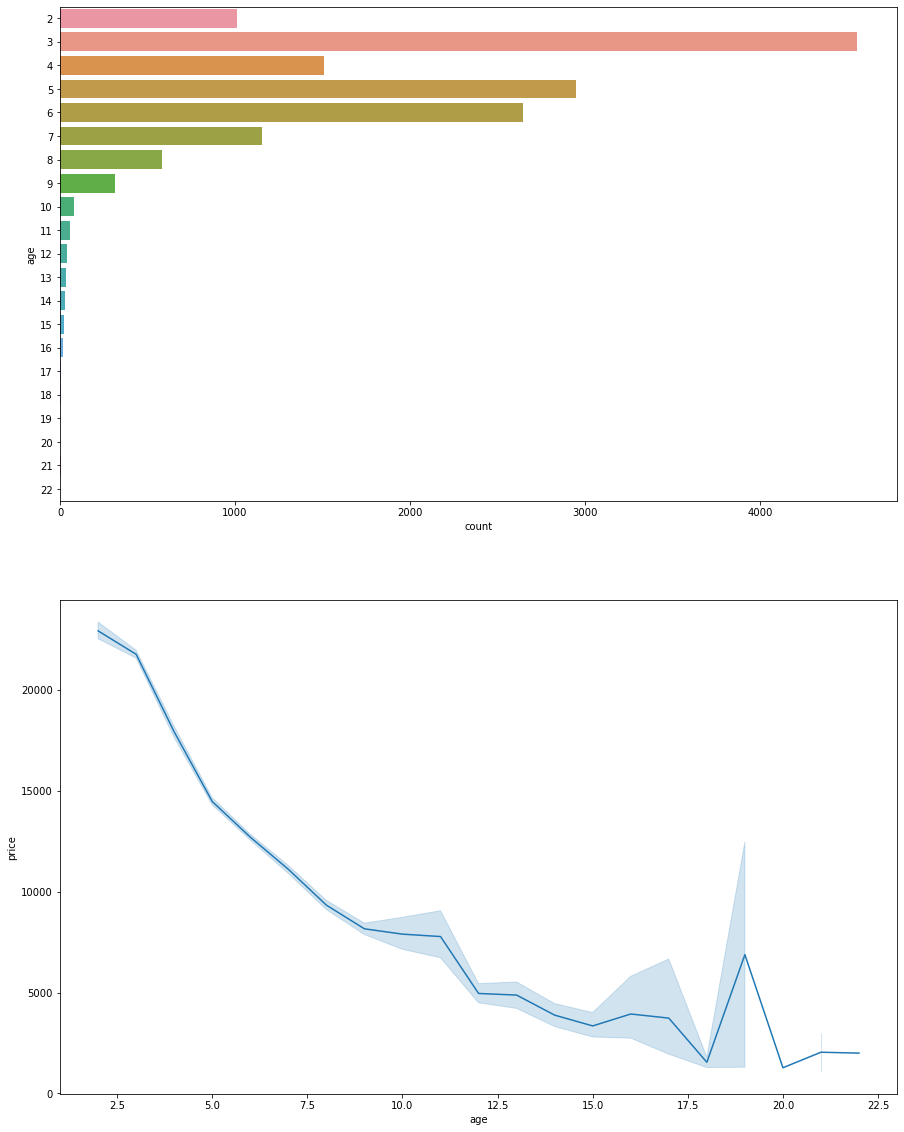

In [14]:
plt.figure(figsize=(15,20))

plt.subplot2grid((2, 1), (0, 0))
sns.countplot(y=data['age'])

plt.subplot2grid((2, 1), (1, 0))
sns.lineplot(x='age',y='price',data=data)
plt.show()


<AxesSubplot:>

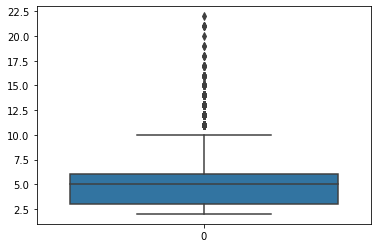

In [15]:
sns.boxplot(data=data['age'])

In [16]:
data_age_max = data['age'].quantile(0.99, interpolation='midpoint')
data[data['age'] >= data_age_max]
data.drop(data[data['age'] >= data_age_max].index, inplace=True)

<AxesSubplot:>

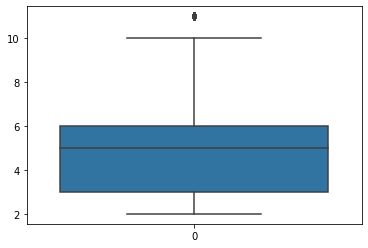

In [17]:
sns.boxplot(data=data['age'])

Majority age is 3 years, and younger car are more expensive.

#### mpg

<AxesSubplot:xlabel='mpg'>

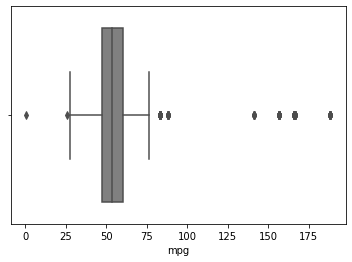

In [18]:
sns.boxplot(data=data,x='mpg',color='grey')

In [19]:
data = data.drop(data[data['mpg'] > 75].index)
data = data.drop(data[data['mpg'] < 25].index)

#### mileage

Text(0.5, 1.0, 'Distribution of Mileage')

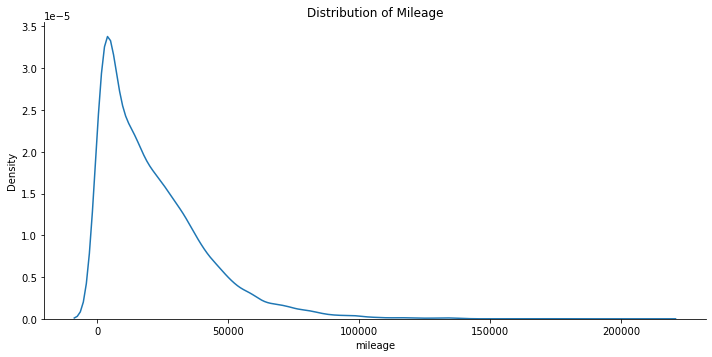

In [20]:
sns.displot(data=data,x='mileage',kind='kde',aspect=10/5,height=5)
plt.title('Distribution of Mileage')

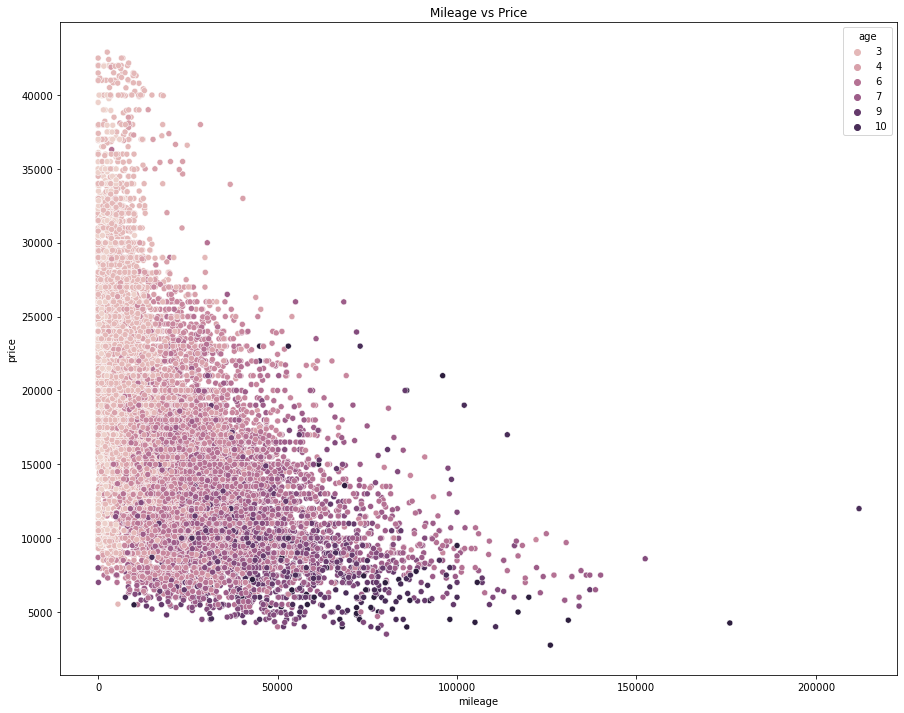

In [21]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data['mileage'],y=data['price'],hue=data['age'])
plt.title('Mileage vs Price')
plt.show()

When mileage is between 0 - 50000, the price is not affected much, but after 50000 the price of the car could drop significantly.

Remove some outliers

In [22]:
data.drop(data[data['mileage'] > 140000].index, inplace=True)


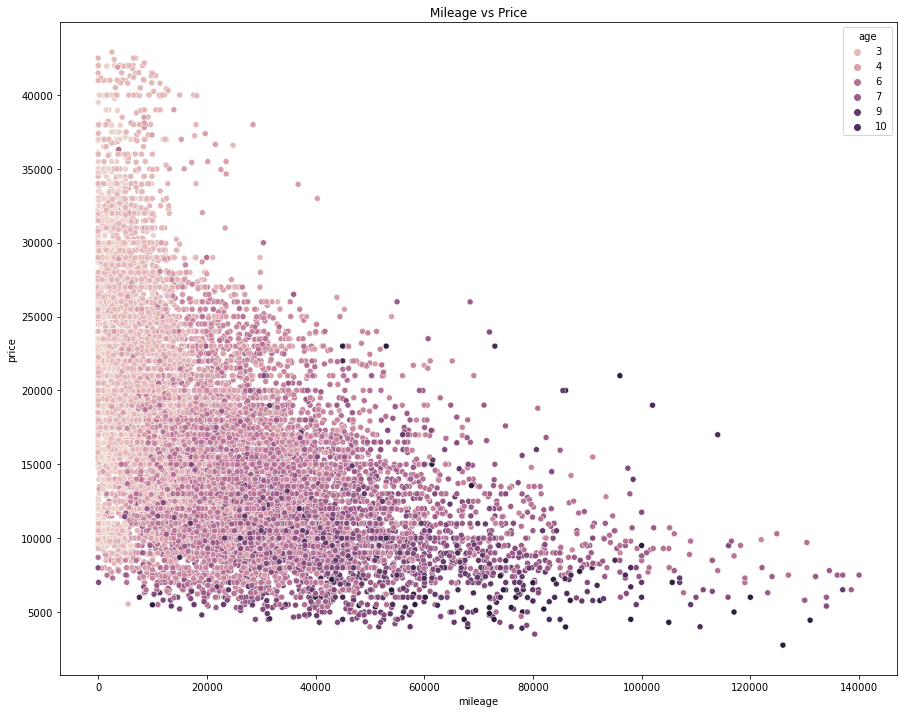

In [23]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data['mileage'],y=data['price'],hue=data['age'])
plt.title('Mileage vs Price')
plt.show()

#### tax

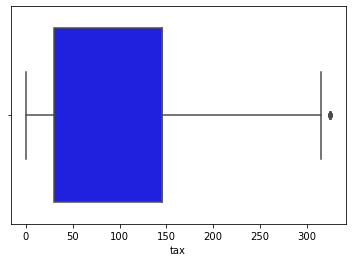

In [24]:
sns.boxplot(data=data, x='tax', color='blue')
plt.show()

In [25]:
data.drop(data[data['tax'] > 400].index, inplace=True)

#### Engine Size

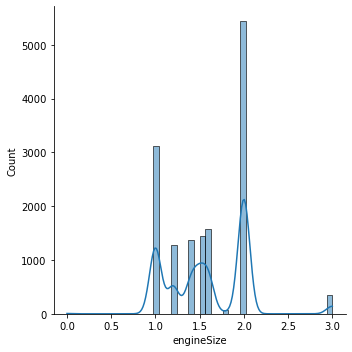

In [26]:
sns.displot(data['engineSize'], kde=True)

### Categories Features

In [27]:
data.select_dtypes(include=['object']).describe()

,model,transmission,fuelType
count,14679,14679,14679
unique,25,3,4
top,Golf,Manual,Petrol
freq,4722,9215,8460


#### Model

In [28]:
pd.DataFrame(
    data.groupby('model').mean().sort_values(by='price',
                                               ascending=False)['price'])


,price
model,
Caravelle,32996.854167
Tiguan Allspace,28770.296703
Touareg,28763.736264
Amarok,27688.816514
Arteon,26285.020161
Shuttle,24388.147541
T-Roc,22839.391542
Sharan,22211.189922
Tiguan,21720.506271


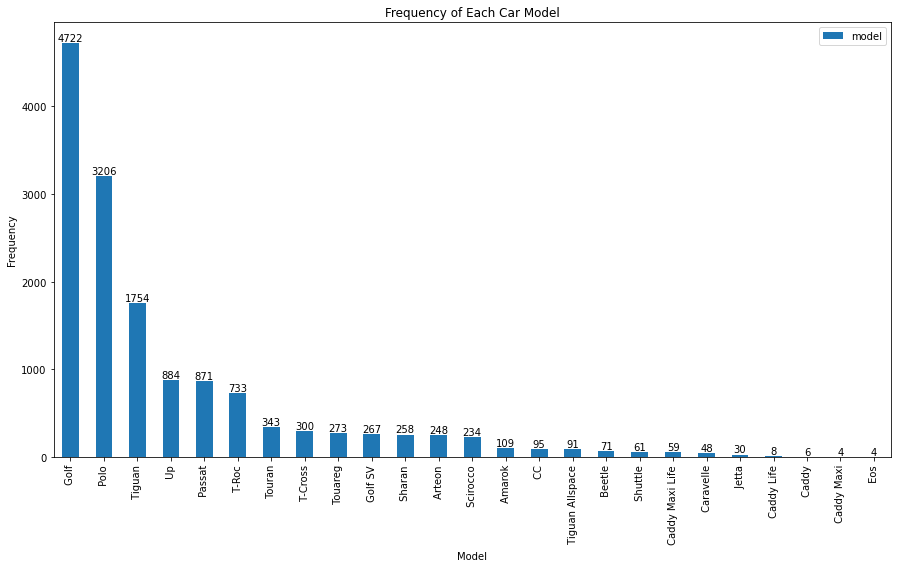

In [29]:
# print(data['model'].value_counts().sort_values(ascending=False) / len(data) * 100)

plt.figure(1, figsize=(15, 8))
ax = data['model'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Frequency of Each Car Model')
plt.xlabel('Model')
plt.ylabel('Frequency')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

Some of the model has less sample size, so we will drop it.

In [31]:
data = data[data.groupby('model').model.transform(len) > 100]

#### Fuel Type

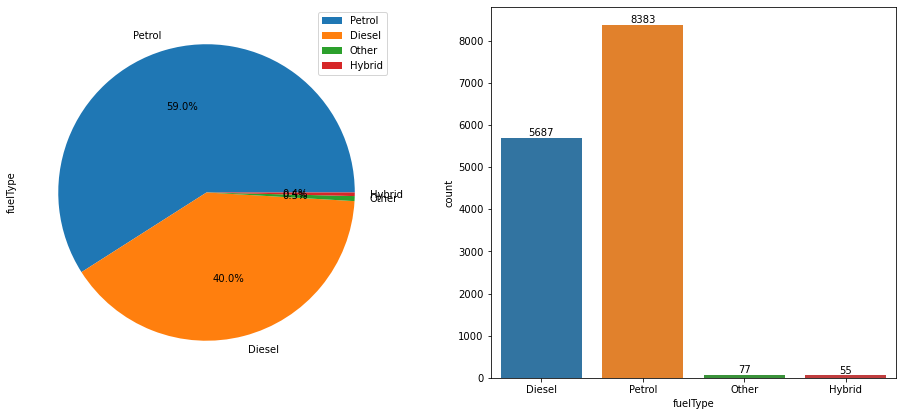

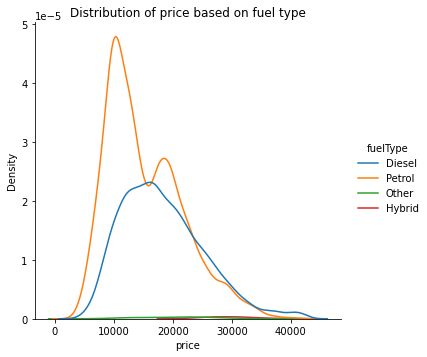

In [32]:
plt.figure(figsize=(16,15))
plt.subplot2grid((2,2),(0,0))
data['fuelType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()

plt.subplot2grid((2, 2), (0, 1))
ax= sns.countplot(x=data['fuelType'])
plt.bar_label(ax.containers[0])
plt.show()

sns.displot(data=data,x='price',kind='kde',hue='fuelType')
plt.title('Distribution of price based on fuel type')
plt.show()


In [33]:
data = data.drop(data[data.fuelType == 'Hybrid'].index)
data = data.drop(data[data.fuelType == 'Other'].index)


#### Transmission

Text(0.5, 1.0, 'Count of different types of transmission')

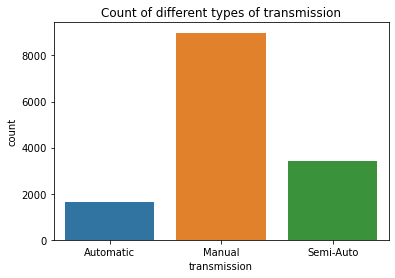

In [34]:
sns.countplot(data=data,x='transmission')
plt.title('Count of different types of transmission')

<AxesSubplot:xlabel='transmission', ylabel='price'>

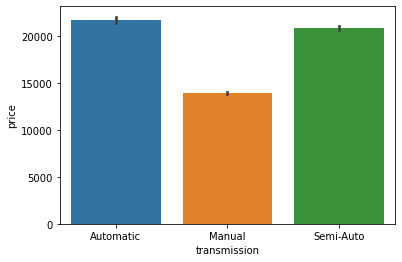

In [35]:
sns.barplot(x=data['transmission'],y=data['price'])

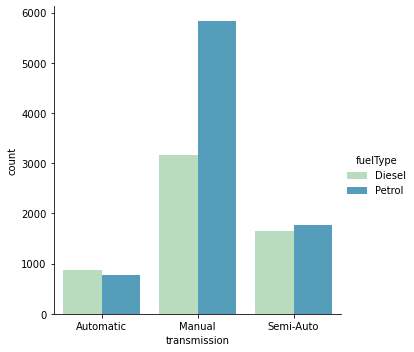

In [36]:
sns.catplot(x='transmission',data=data,kind='count', hue='fuelType', palette='GnBu')

Most of the auto car use diesel, most of the manual car use petrol. Auto car has higher price and most of the car is manual car.

## Feature Engineering

### Feature with category - OneHotEncoder

In [37]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,price,mileage,tax,mpg,engineSize,age,model_ Amarok,model_ Arteon,model_ Golf,model_ Golf SV,...,model_ T-Roc,model_ Tiguan,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,25000,13904,145,49.6,2.0,3,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,26883,4562,145,49.6,2.0,3,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,20000,7414,145,50.4,2.0,3,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,33492,4825,145,32.5,2.0,3,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,22900,6500,150,39.8,1.5,3,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### Number features - 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [39]:
num_columns = ['mileage', 'tax', 'mpg', 'engineSize', 'age']

In [78]:
ct = ColumnTransformer([('num', StandardScaler(), num_columns)],
                       remainder='passthrough')

In [82]:
data_encoded2 = pd.DataFrame(StandardScaler().fit_transform(data_encoded), columns=data_encoded.columns)
data_encoded2

,price,mileage,tax,mpg,engineSize,age,model_ Amarok,model_ Arteon,model_ Golf,model_ Golf SV,...,model_ T-Roc,model_ Tiguan,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,1.241024,-0.378448,0.549548,-0.391100,0.920693,-0.92354,-0.088360,-0.133398,-0.706089,-0.139081,...,4.287209,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,1.214110,-1.214110
1,1.515778,-0.856243,0.549548,-0.391100,0.920693,-0.92354,-0.088360,-0.133398,-0.706089,-0.139081,...,4.287209,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,1.214110,-1.214110
2,0.511462,-0.710378,0.549548,-0.308725,0.920693,-0.92354,-0.088360,-0.133398,-0.706089,-0.139081,...,4.287209,-0.375412,-0.14014,-0.157601,-0.258453,-0.364862,0.751829,-0.567556,1.214110,-1.214110
3,2.480113,-0.842792,0.549548,-2.151869,0.920693,-0.92354,-0.088360,-0.133398,-0.706089,-0.139081,...,4.287209,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,-0.823648,0.823648
4,0.934608,-0.757125,0.630186,-1.400195,-0.177545,-0.92354,-0.088360,-0.133398,-0.706089,-0.139081,...,4.287209,-0.375412,-0.14014,-0.157601,-0.258453,-0.364862,-1.330090,1.761940,-0.823648,0.823648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14065,1.021426,0.837725,2.404206,-1.770884,3.117169,0.19530,11.317357,-0.133398,-0.706089,-0.139081,...,-0.233252,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,1.214110,-1.214110
14066,0.000768,1.057392,2.404206,-1.863556,0.920693,0.75472,11.317357,-0.133398,-0.706089,-0.139081,...,-0.233252,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,1.214110,-1.214110
14067,-0.510655,3.914138,2.404206,-1.863556,0.920693,1.31414,11.317357,-0.133398,-0.706089,-0.139081,...,-0.233252,-0.375412,-0.14014,-0.157601,-0.258453,2.740766,-1.330090,-0.567556,1.214110,-1.214110
14068,-0.072918,0.853938,2.404206,-1.863556,0.920693,1.31414,11.317357,-0.133398,-0.706089,-0.139081,...,-0.233252,-0.375412,-0.14014,-0.157601,-0.258453,-0.364862,0.751829,-0.567556,1.214110,-1.214110


In [88]:
data_encoded_std = ct.fit_transform(data_encoded)
data_encoded = pd.DataFrame(data_encoded_std, columns=data_encoded.columns)

In [89]:
data_encoded = data_encoded.rename(
    columns={
        'price': 'mileage',
        'mileage': 'tax',
        'tax': 'mpg',
        'mpg': 'engineSize',
        'engineSize': 'age',
        'age': 'price',
    })
price = data_encoded.pop('price')
data_encoded['price'] = price
data_encoded

,mileage,tax,mpg,engineSize,age,model_ Amarok,model_ Arteon,model_ Golf,model_ Golf SV,model_ Passat,...,model_ Tiguan,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol,price
0,-0.378448,0.549548,-0.391100,0.920693,-0.92354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25000.0
1,-0.856243,0.549548,-0.391100,0.920693,-0.92354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,26883.0
2,-0.710378,0.549548,-0.308725,0.920693,-0.92354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20000.0
3,-0.842792,0.549548,-2.151869,0.920693,-0.92354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33492.0
4,-0.757125,0.630186,-1.400195,-0.177545,-0.92354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14065,0.837725,2.404206,-1.770884,3.117169,0.19530,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23495.0
14066,1.057392,2.404206,-1.863556,0.920693,0.75472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16500.0
14067,3.914138,2.404206,-1.863556,0.920693,1.31414,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12995.0
14068,0.853938,2.404206,-1.863556,0.920693,1.31414,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,15995.0


In [90]:
data_encoded.corr()['price'].sort_values(ascending=False)

price                     1.000000
engineSize                0.595958
tax                       0.550958
transmission_Semi-Auto    0.359528
model_ Tiguan             0.284459
transmission_Automatic    0.277213
model_ Touareg            0.252126
fuelType_Diesel           0.217722
model_ T-Roc              0.215684
model_ Arteon             0.190570
model_ Amarok             0.144323
model_ Sharan             0.112922
model_ T-Cross            0.073483
model_ Touran             0.031656
model_ Golf               0.024008
model_ Passat            -0.011944
model_ Golf SV           -0.012612
model_ Scirocco          -0.051788
fuelType_Petrol          -0.217722
model_ Up                -0.319523
model_ Polo              -0.398550
transmission_Manual      -0.507153
mileage                  -0.517825
age                      -0.636242
mpg                      -0.730621
Name: price, dtype: float64

<AxesSubplot:>

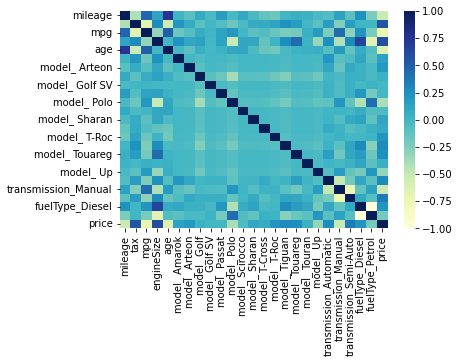

In [91]:
sns.heatmap(data_encoded.corr(), cmap='YlGnBu')

In [94]:
data_encoded.to_csv('vw_encoded.csv')

## Modeling

#### Select best features

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.linear_model import LinearRegression

# column_names = data_encoded.drop(columns=['price']).columns

# no_of_features = []
# r_squared_train = []
# r_squared_test = []

# # selector = SelectKBest(f_regression, k=10)
# # selector.fit(X_train, y_train)
# # X_test_transformed = selector.transform(X_test)


# for k in range(5, 24):
#     selector = SelectKBest(f_regression, k=k)
#     X_train_transformed = selector.fit_transform(X_train, y_train)
#     X_test_transformed = selector.transform(X_test)
#     regressor = LinearRegression()
#     regressor.fit(X_train_transformed, y_train)
#     no_of_features.append(k)
#     r_squared_train.append(regressor.score(X_train_transformed, y_train))
#     r_squared_test.append(regressor.score(X_test_transformed, y_test))

# sns.lineplot(x=no_of_features, y=r_squared_train, legend='full')
# sns.lineplot(x=no_of_features, y=r_squared_test, legend='full')

# 3. Apply Algorithm